# Titanic - Machine Learning from Disaster

## Importer les packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Ouvrir notre base de données

In [29]:
df0= pd.read_csv('titanic/train.csv')

les valeurs manquantes sont reperées par des NaN (Not a Number)

## Les valeurs manquantes

In [30]:
df0.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


Note : les valeurs manquantes retournent True

In [31]:
df0.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

ce resultat nous indique que les varaibles qui ont des valeurs manquantes sont Age(177), Cabin(687) et Embarked(2)

<AxesSubplot:>

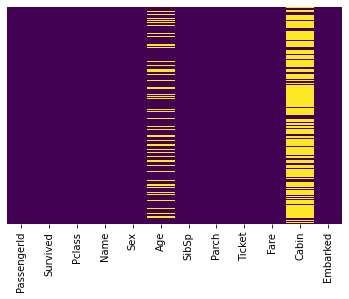

In [32]:
#Nous pouvons egalement utiliser des visuls pour montrer les valeurs manquantes
sns.heatmap(df0.isnull(), yticklabels=False, cbar=False, cmap='viridis')

les valeurs manquantes sont representées en jaune sur le graphique, il s'agit notamment des variables Age et Cabin

In [33]:
df0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [35]:
df0.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [12]:
#Les deux variables qui ont des valeurs manquantes sont de types int et object

La premiere idéee qui vient en tete est de se debarasser des lignes de cess valeurs manquantes

In [13]:
#Visualisons la taille de notre base de données pour voir l'impact de cette actions sur nos resultats

In [36]:
df0.shape

(891, 12)

In [37]:
df0.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [38]:
#Supprimer les lignes qui comportent des doublons et afficher la taille de la base de données
df0.dropna(how='any').shape

(183, 12)

Nous sommes passés de 891 lignes à 183 apres suppression des valeurs vides

Note : cette technique n'est pas a recommander, car elle peut impacter le resultat de notre analyse ( trop de valeurs vides supprimées)

Ici nous n'avons pas utilisés la variable inplace donc le dropna() effectué n'a pas d'impact sur notre base de données

In [39]:
#Affichons la taille de notre base de données
df0.shape

(891, 12)

In [40]:
#Supprimons les valeurs manquantes uniquement de la variable Age(177) : methode1
df0['Age'].dropna(how='any').shape

(714,)

In [41]:
#Supprimons les valeurs manquantes uniquement de la variable Age(177) : methode2
df0.dropna(subset=['Age'], how='any').shape

(714, 12)

Note : On remarque que les valeurs manquantes sont elevées, donc la solution n'est pas de les supprimer

In [24]:
#La variable Age etant de type numerique, nous allons tenter de remplacer les valeurs manquantes par la mediane

In [42]:
df0['Age'].median()

28.0

In [43]:
df0['Age'].fillna(df['Age'].median(), inplace=True)

In [44]:
#Observons a nouveau le contenu de notre base de données
df0.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
df0.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

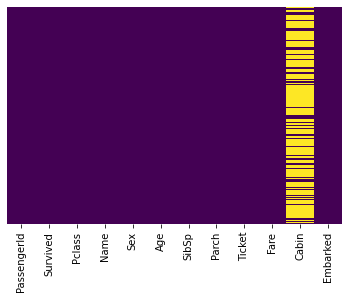

In [46]:
sns.heatmap(df0.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [47]:
#Analysons maintenant les valeurs manquantes de la variable cabin

In [49]:
#Pour les variables categoriques la demarche peut etre un peu differente
df['Cabin'].value_counts()

28.0           687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64

On ne vois pas ici d'occurrence qui domine réellement : G6(4), B96 B98(4)...

In [55]:
#Nous allons donc renseigner un nom qui indique que le champ est vide
df0['Cabin'].fillna(value='No Cabin Number', inplace=True)

In [56]:
df0.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

Notre base de données ne contient donc plus de valeur vide

In [57]:
df0['Cabin'].value_counts()

No Cabin Number    687
C23 C25 C27          4
G6                   4
B96 B98              4
C22 C26              3
                  ... 
E34                  1
C7                   1
C54                  1
E36                  1
C148                 1
Name: Cabin, Length: 148, dtype: int64

Notre approche n'est pas bonne car nous avons 687 valeur de No cabin Number

Autre technique

In [58]:
df2= pd.read_csv('titanic/train.csv')

In [59]:
#remplacer les valeurs vides par les valeurs en dessus

In [60]:
df2['Cabin'].fillna(method='bfill', inplace=True)

In [61]:
df2['Cabin']

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

Nous remarquons que nous avons encore une valeur vide a la fin

In [ ]:
#Remplaçons la dernier valeur vide par la valeur au dessus grace a ffill

In [63]:
df2['Cabin'].fillna(method='ffill', inplace=True)

In [64]:
df2['Cabin']

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

In [65]:
df2['Cabin'].isna().sum()

0

In [66]:
#Cette technique marche egalement pour les variables de type numerique
df2['Age'].fillna(method='ffill', inplace=True)

<AxesSubplot:>

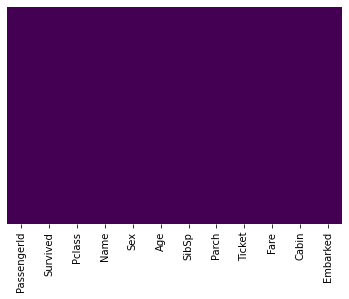

In [67]:
sns.heatmap(df2.isnull(), yticklabels=False, cbar=False, cmap='viridis')